# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise e Previsão de Séries Temporais com Inteligência Artificial</font>

## <font color='blue'>Lab 1 - Parte 4</font>
### <font color='blue'>Prevendo o Comportamento do Consumo de Energia ao Longo do Tempo e o Impacto na Economia</font>

![title](imagens/Lab1.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [4]:
# Imports para formatação dos gráficos
from pylab import rcParams
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy      : 1.21.5
matplotlib : 3.5.2
statsmodels: 0.13.2
pandas     : 1.5.3
seaborn    : 0.11.2



## Carregando o Conjunto de Dados

In [6]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados_serie = pd.read_csv('dados/dataset.csv', 
                          header = None, 
                          index_col = 0,
                          names = ['consumo_energia'])

In [7]:
# Série
dados_serie.head()

consumo_energia
2004-01              112
2004-02              118
2004-03              132
2004-04              129
2004-05              121

## Suavização Através da Média Móvel Simples

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [8]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
dados_serie.mean()

consumo_energia    280.3125
dtype: float64

In [9]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_serie = dados_serie.copy()

In [10]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
dados_serie['consumo_energia_serie_suavizada'] = dados_serie.rolling(window = 12).mean()

In [11]:
# Imprime o dataset 
dados_serie

consumo_energia  consumo_energia_serie_suavizada
2004-01              112                              NaN
2004-02              118                              NaN
2004-03              132                              NaN
2004-04              129                              NaN
2004-05              121                              NaN
...                  ...                              ...
2015-08              606                       463.333333
2015-09              508                       467.083333
2015-10              461                       471.583333
2015-11              390                       473.916667
2015-12              432                       476.166667

[144 rows x 2 columns]

Agora temos duas colunas e alguns valores NaN na coluna das médias móveis. Isso é normal e esperado, afinal, calculamos a média de 12 valores consecutivos "deslizando" a janela pela série e para alguns valores (os primeiros da série) não teremos como calcular a média dos 12 valores anteriores e assim eles ficam como NaN. Ou seja, perdemos registros da série ao aplicar esta técnica de suavização.

In [12]:
# Primeiros 20 registros da série
dados_serie.head(20)

consumo_energia  consumo_energia_serie_suavizada
2004-01              112                              NaN
2004-02              118                              NaN
2004-03              132                              NaN
2004-04              129                              NaN
2004-05              121                              NaN
2004-06              135                              NaN
2004-07              148                              NaN
2004-08              148                              NaN
2004-09              136                              NaN
2004-10              119                              NaN
2004-11              104                              NaN
2004-12              118                       126.666667
2005-01              115                       126.916667
2005-02              126                       127.583333
2005-03              141                       128.333333
2005-04              135                       128.833333
2005-05              125                       129.166667
2005-06              149                       130.333333
2005-07              170                       132.166667
2005-08              170                       134.000000

In [13]:
# Últimos 20 registros da série
dados_serie.tail(20)

consumo_energia  consumo_energia_serie_suavizada
2014-05              420                       397.083333
2014-06              472                       400.166667
2014-07              548                       404.916667
2014-08              559                       409.416667
2014-09              463                       414.333333
2014-10              407                       418.333333
2014-11              362                       422.666667
2014-12              405                       428.333333
2015-01              417                       433.083333
2015-02              391                       437.166667
2015-03              419                       438.250000
2015-04              461                       443.666667
2015-05              472                       448.000000
2015-06              535                       453.250000
2015-07              622                       459.416667
2015-08              606                       463.333333
2015-09              508                       467.083333
2015-10              461                       471.583333
2015-11              390                       473.916667
2015-12              432                       476.166667

Vamos plotar a série original e a série suavizada com a média móvel:

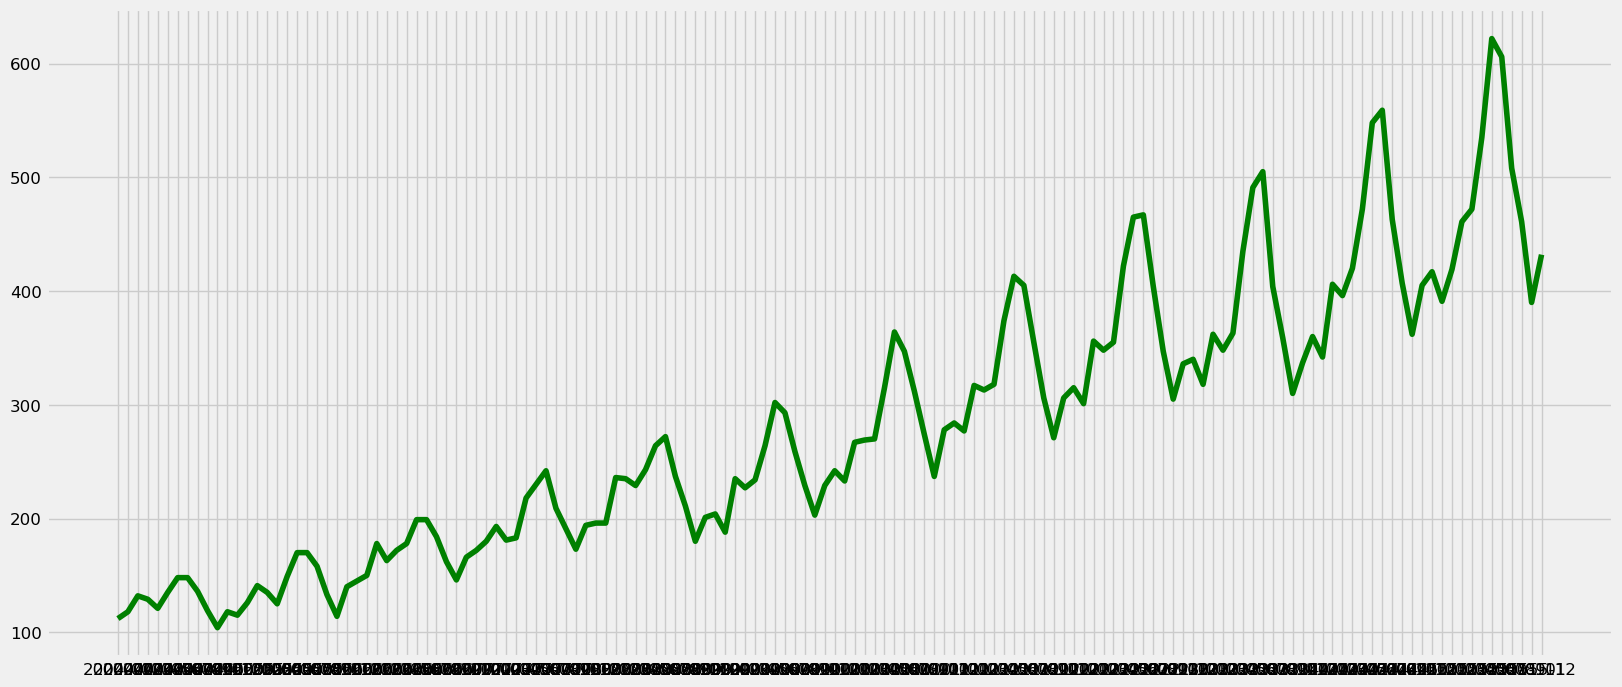

In [14]:
# Plot da série original
plt.plot(dados_serie['consumo_energia'], color = 'green')

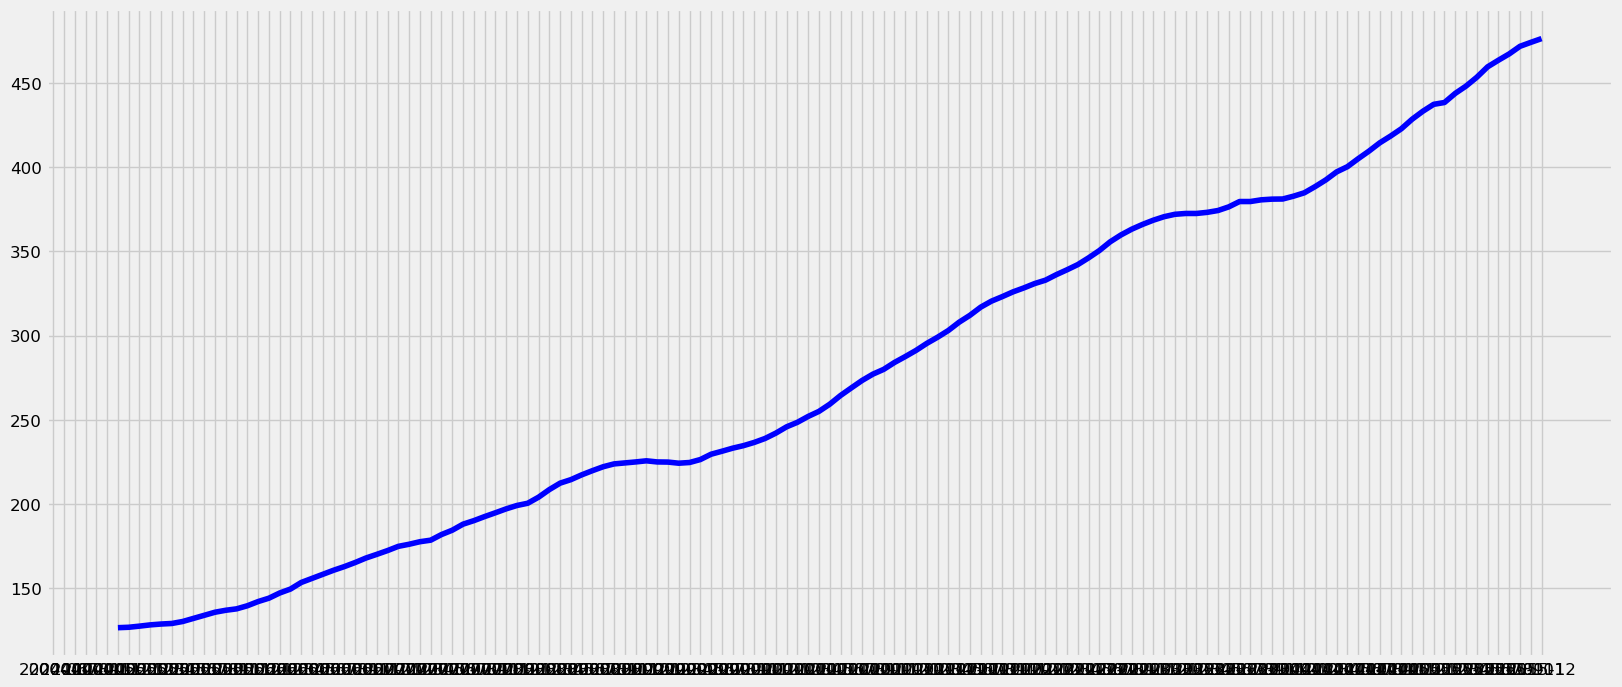

In [15]:
# Plot da série suavizada
plt.plot(dados_serie['consumo_energia_serie_suavizada'], color = 'blue')

A diferença é grande, não é? Vamos colocar as duas juntas agora.

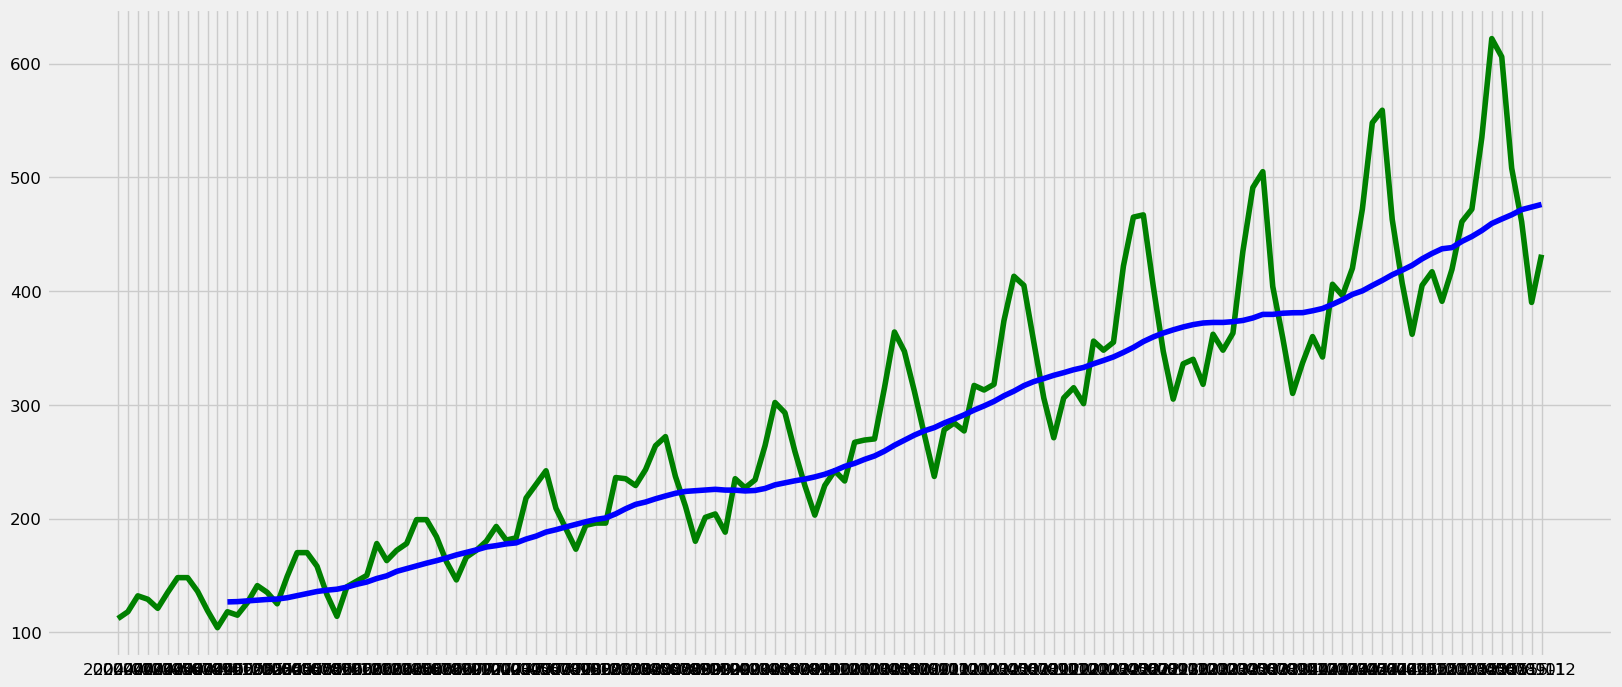

In [16]:
# Agora as duas juntas
plt.plot(dados_serie['consumo_energia'], color = 'green')
plt.plot(dados_serie['consumo_energia_serie_suavizada'], color = 'blue')

In [17]:
# Calculando a diferença entre a série original e a série suavizada
# Aqui estamos removendo a tendência da série original e deixando apenas a sazonalidade
diff_original_suavizada = dados_serie['consumo_energia'] - dados_serie['consumo_energia_serie_suavizada']
diff_original_suavizada.head(20)

2004-01          NaN
2004-02          NaN
2004-03          NaN
2004-04          NaN
2004-05          NaN
2004-06          NaN
2004-07          NaN
2004-08          NaN
2004-09          NaN
2004-10          NaN
2004-11          NaN
2004-12    -8.666667
2005-01   -11.916667
2005-02    -1.583333
2005-03    12.666667
2005-04     6.166667
2005-05    -4.166667
2005-06    18.666667
2005-07    37.833333
2005-08    36.000000
dtype: float64

In [18]:
# Vamos remover os valores NA para testar a estacionaridade
diff_original_suavizada.dropna(inplace = True)

In [19]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

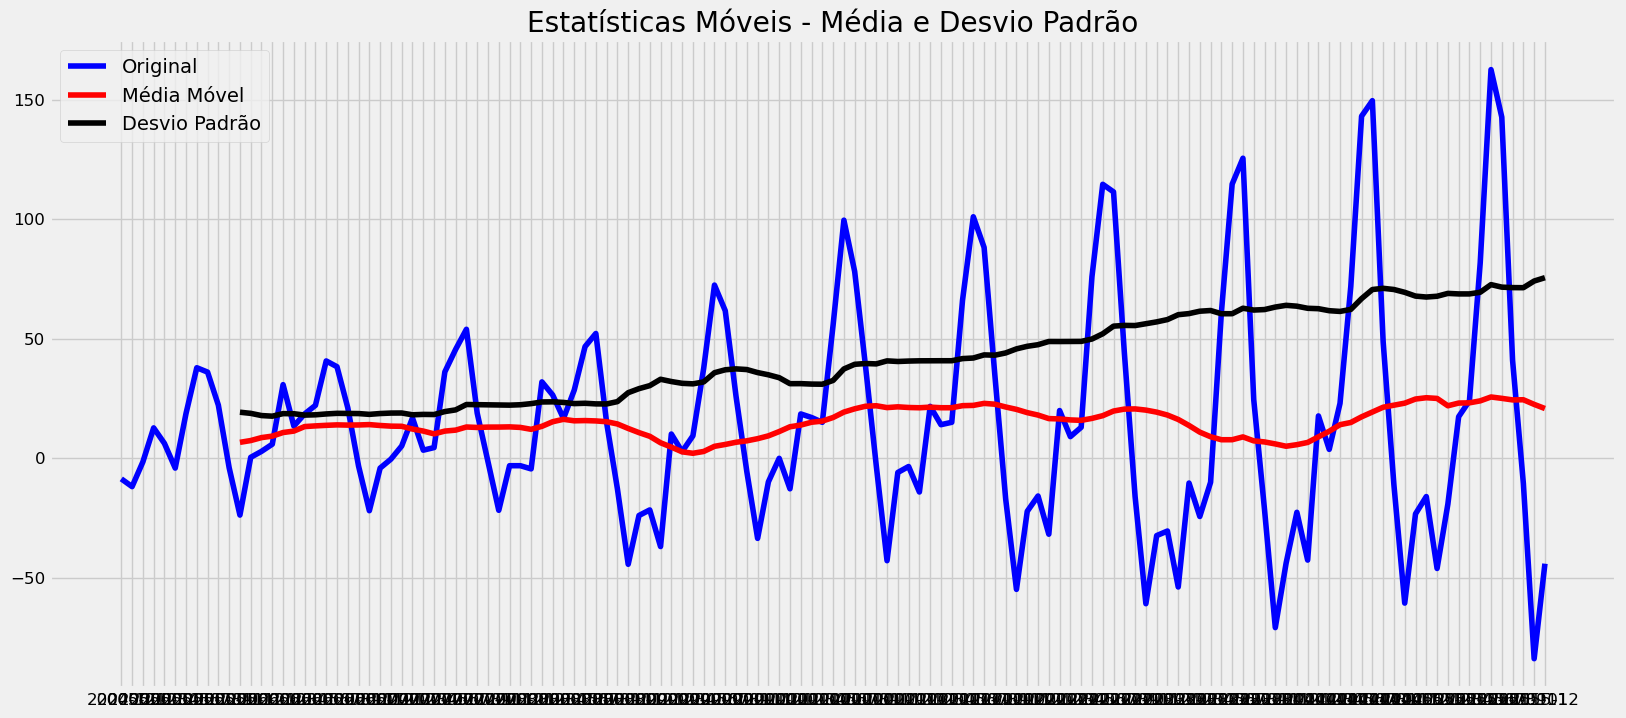


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -3.157851
Valor-p                           0.022558
Número de Lags Consideradas      13.000000
Número de Observações Usadas    119.000000
Valor Crítico (1%)               -3.486535
Valor Crítico (5%)               -2.886151
Valor Crítico (10%)              -2.579896
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [20]:
# Executando o teste de estacionaridade
testa_estacionaridade(diff_original_suavizada)

Aplicamos a suavização e extraímos a tendência da série. Esta série foi transformada e já poderíamos usá-la para modelagem estatística. Mas temos um problema. Perdemos uma parte dos dados, parte essa que poderia ser importante para prever o comportamento futuro.

Vamos testar outra técnica de suavização e verificar se temos sucesso sem perder tantos dados.

### Suavização Através da Média Móvel Ponderada Exponencial

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial.
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [21]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
serie_suavizada_exp = df_serie.ewm(alpha = 0.2, adjust = True).mean()

In [22]:
serie_suavizada_exp

consumo_energia
2004-01       112.000000
2004-02       115.333333
2004-03       122.163934
2004-04       124.479675
2004-05       123.444550
...                  ...
2015-08       512.214093
2015-09       511.371274
2015-10       501.297019
2015-11       479.037615
2015-12       469.630092

[144 rows x 1 columns]

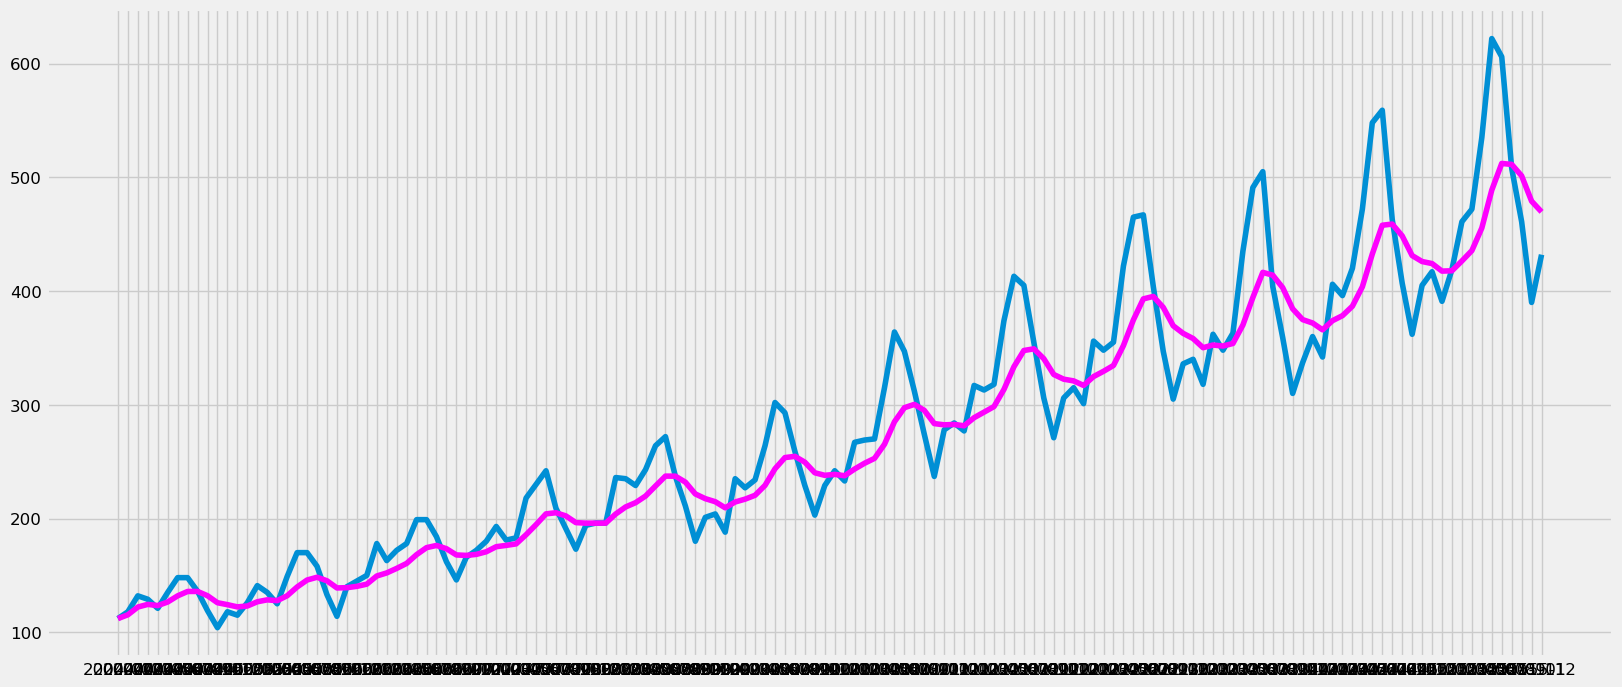

In [23]:
# Plt das séries
plt.plot(df_serie)
plt.plot(serie_suavizada_exp, color = 'magenta')

Suavização aplicada. Vamos agora calcular a diferença e aplicar o teste de estacionaridade.

In [24]:
# Diferença
diff_original_suav_exp = df_serie.consumo_energia - serie_suavizada_exp.consumo_energia

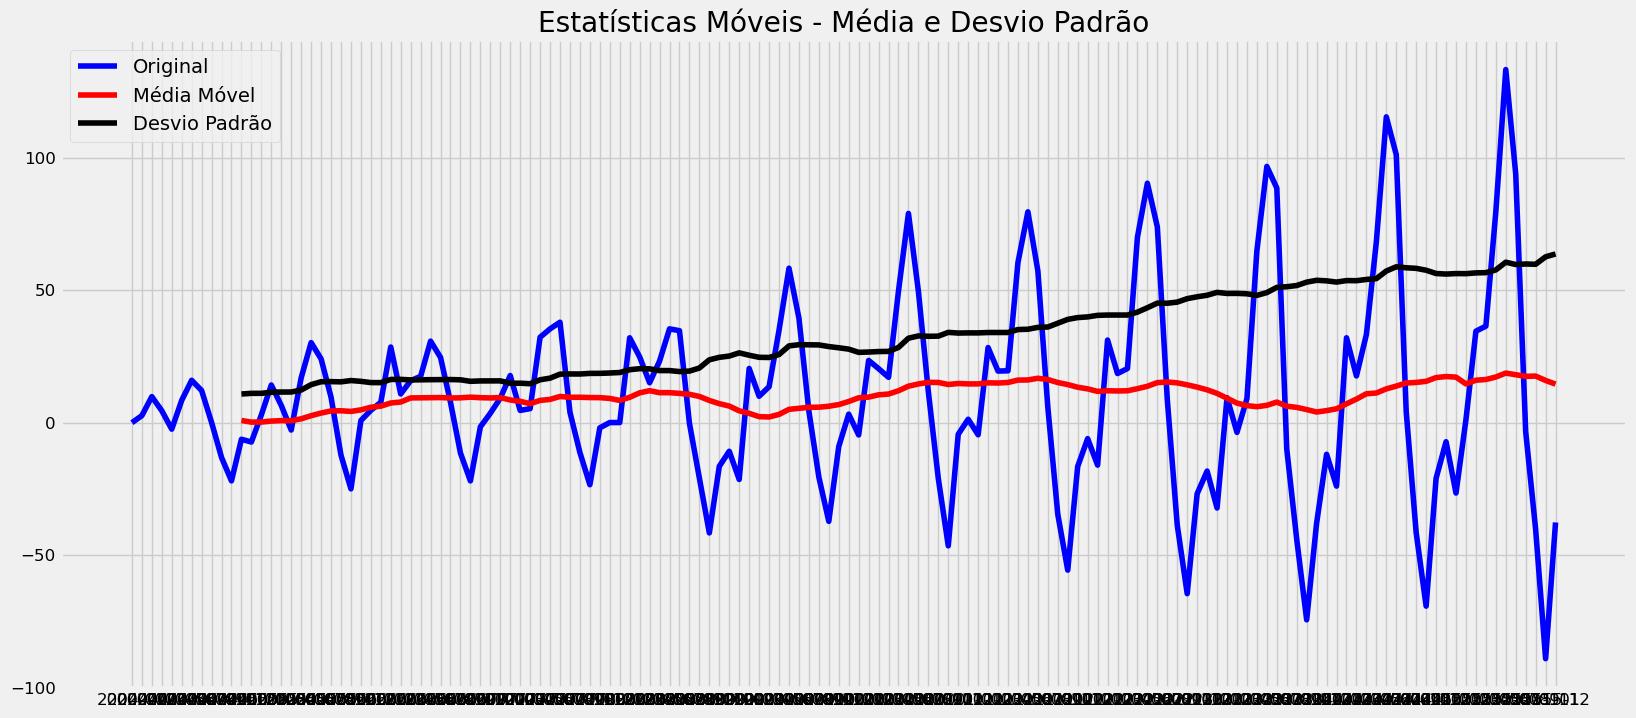


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.795521
Valor-p                           0.058916
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [25]:
# Executando o teste de estacionaridade
testa_estacionaridade(diff_original_suav_exp)

Perceba que a Suavização Exponencial não foi suficiente para deixar a série estacionária.

**Com a suavização podemos transformar nossa série em estacionária. Mas essas técnicas simples de suavização não funcionam em todos os casos, principalmente nos de alta sazonalidade. E para esses casos precisamos da Diferenciação, tema da próxima aula.**

# Fim da Parte 4